In [1]:
# from seqshannon import shannon_entropy
from Bio.Seq import Seq

# Define your sequences
sequence1 = Seq("DSNYIIDWDWWWCMQCNSQQ")
sequence2 = Seq("DDDDIDDWDWMWCMDDSSQD")

# Calculate the Shannon entropy
entropy1 = shannon_entropy(sequence1)
entropy2 = shannon_entropy(sequence2)

print(f"Entropy of sequence 1: {entropy1}")
print(f"Entropy of sequence 2: {entropy2}")


NameError: name 'shannon_entropy' is not defined

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.interpolate import make_interp_spline



Bad key "text.kerning_factor" on line 4 in
/home/perm/anaconda3/envs/PGAN/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:

gen_path  = "/home/perm/cov/model/escape_gan/archives/m2/fs_12000.csv"
train_path = "/home/perm/ProteinGAN/data/cov_seqs/sars_db/raw_datasets/sig_windows_with_pos_and_full_seq.csv"
gen_df = pd.read_csv(gen_path, header=0)
print(gen_df.head())
gen_seqs = gen_df['window_seqs']


            window_seqs
0  EFDDYAQDFWIQCMSASSTA
1  DWCDDDCNSDMMDDDDDFWD
2  MDRQRQHCDIDGDDDYYYDW
3  DWDDDDDSNRFDIYDDDFFQ
4  YWIQCRFWDIKGRWCYYYMW


In [4]:
train_df = pd.read_csv(train_path, header=0)
# print(train_df.head())
train_seqs  = train_df['window']
print("Train seqes: ", train_df.count())


Train seqes:  window       28095
start_pos    28095
end_pos      28095
full_seq     28095
dtype: int64


In [5]:
def get_entropy_scores(sequences):
    entropies = []
    for record in sequences:
        # print(record)
        sequence = Seq(record)
        entropy = shannon_entropy(sequence)
        entropies.append(entropy)
    assert len(sequences), len(entropies)
    return entropies

In [6]:
gen_entropies  = get_entropy_scores(gen_seqs)
print(gen_entropies[0:5], "Len: ", len(gen_entropies))

NameError: name 'shannon_entropy' is not defined

In [7]:
train_entropies  = get_entropy_scores(train_seqs)
print(train_entropies[0:5], "Len of train entropies: ", len(train_entropies))

NameError: name 'shannon_entropy' is not defined

In [8]:
positions = np.arange(1, 21) #20 postions
# plt.figure(figsize=(8, 6))  # Set the size of the figure
# plt.plot(positions, gen_entropies, linestyle='-')

In [9]:
random_train_samples = np.random.choice(train_entropies, size= len(gen_entropies) , replace=False) 
random_train_samples = random_train_samples.tolist()
random_train_samples[0:5]


NameError: name 'train_entropies' is not defined

In [10]:
for i in range(10):
    #replace False means each element can be taken only once
    #compute pearsons correlation of natural and generated sequences 
    correlation_matrix = np.corrcoef(random_train_samples, gen_entropies)
    print(correlation_matrix[0, 1])


NameError: name 'random_train_samples' is not defined

In [11]:
correlation_matrix

NameError: name 'correlation_matrix' is not defined

In [12]:
plt.boxplot([gen_entropies, random_train_samples ], labels=["Natural Spikes", "Generated Spikes"], vert=False)

NameError: name 'gen_entropies' is not defined

In [13]:
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np
from collections import Counter

def shannon_entropy(sequence):
    # Count the frequency of each base
    base_counts = Counter(sequence)
    
    # Calculate the total number of bases
    num_bases = sum(base_counts.values())
    
    # Calculate the probability of each base
    base_probs = {base: count / num_bases for base, count in base_counts.items()}
    
    # Calculate the Shannon entropy
    entropy = -sum(prob * np.log2(prob) for prob in base_probs.values())
    
    return entropy

# Load your sequences
# sequences = list(SeqIO.parse("sequences.fasta", "fasta"))

# Calculate the Shannon entropy for each sequence
# gen_entropies = [shannon_entropy(sequence) for sequence in gen_seqs]
train_entropies = [shannon_entropy(sequence) for sequence in train_seqs]
random_train_samples = np.random.choice(train_entropies, size= len(gen_entropies) , replace=False) 


# Plot the Shannon entropy for each sequence
plt.plot(gen_entropies)
plt.plot(train_entropies[0: len(gen_entropies)])

plt.xlabel('Sequence index')
plt.ylabel('Shannon entropy')
plt.show()


NameError: name 'gen_entropies' is not defined

In [14]:
#shannnon entropy
#Source natural sequence:
nat_seqs = "/home/perm/ProteinGAN/data/cov_seqs/sars_db/raw_datasets/fasta_with_full_postional_info.fasta"
#align generated seqs
gen_seqs = "/home/perm/ProteinGAN/data/shannon/12000.fasta"
blast_path = "/home/perm/ProteinGAN/data/cov_seqs/sars_db/full/cov_db_full"
blast_qry  = "blastp -query 12000.fasta -db /home/perm/ProteinGAN/data/cov_seqs/sars_db/cov_blast/covdb_train -out /home/perm/ProteinGAN/data/shannon/blast_out"

In [15]:
from Bio import AlignIO
import numpy as np

def get_entropy(alignment_path):
    # Load your alignment
    #""
    alignment = AlignIO.read(alignment_path, "clustal")

    # Calculate the Shannon entropy for each position
    entropy = []
    for i in range(len(alignment[0])):
        # Get the bases at this position
        bases = alignment[:, i]
        
        # Calculate the frequency of each base
        freqs = dict((base, bases.count(base) / len(bases)) for base in set(bases))
        
        # Calculate the Shannon entropy for this position
        entropy_i = -sum(freq * np.log2(freq) for freq in freqs.values())
        entropy.append(entropy_i)
    print(entropy)
    return entropy


In [16]:
entropy_val =  get_entropy("/home/perm/ProteinGAN/data/shannon/val.aln")
len(entropy_val)

[0.0018010486441692778, 0.0066096983580612384, 0.01745056857988732, 0.02520226988628913, 0.03276342083703126, 0.056402098001500006, 0.07639088040669936, 0.10668469964135506, 0.12494392313321101, 0.16784399823153515, 0.18628506328410904, 0.22078530089459822, 0.24718881106660157, 0.2531454313167454, 0.260880503496128, 0.2653465432258008, 0.2791702772477305, 0.2885011926384454, 0.29323414496100053, 0.31101827528495507, 0.3238590391809553, 0.4029858753547436, 0.3840253479368229, 0.06480812179455915, 0.07945274431187048, 0.12318435635275088, 0.12507861493575104, 0.16372009811615307, 0.4368985233906579, 0.515580790479031, 0.5447179305398963, 0.5720184988630435, 0.5727841794593125, 0.6311856903642287, 0.5599006145760074, 0.5701161503297415, 0.5708803116509162, 0.5810614405996328, 0.630513462065783, 0.6764741485387057, 0.6810230309627884, 0.7001091740270429, 0.7212649674787766, 0.7348576352769888, 0.7516940976310498, 0.6631884236937887, 0.7191052693802586, 0.774872270228574, 0.8227788685435791

281

In [17]:
entropy_gen =  get_entropy("/home/perm/ProteinGAN/data/shannon/12000.aln")
len(entropy_gen)

[0.005279672136735204, 0.005580475509604936, 0.005580475509604936, 0.005279672136735204, 0.0012494484760257351, 1.1789965852407431, 1.280775866210249, 1.3763832247466237, 2.076529387185092, 2.358663217482648, 2.2671889511477237, 2.4012794640919086, 3.3838867870917344, 3.104641785956425, 3.0336003453240687, 2.935898198965418, 2.6068525502965527, 2.4885092541136005, 2.952241547531612, 2.977380198033404, 2.9120819838893968, 2.6609837870111215, 2.9267151571489896, 3.179900713268466, 2.418560684837229, 3.247089318990256, 3.3180315191218837, 2.9129496209096573, 2.309325050233027, 2.413154850176003, 2.546812253146791, 2.2282250954366414, 0.1098479610582655, 0.002498886932500934, 0.002498886932500934, 0.0012494484760257351]


36

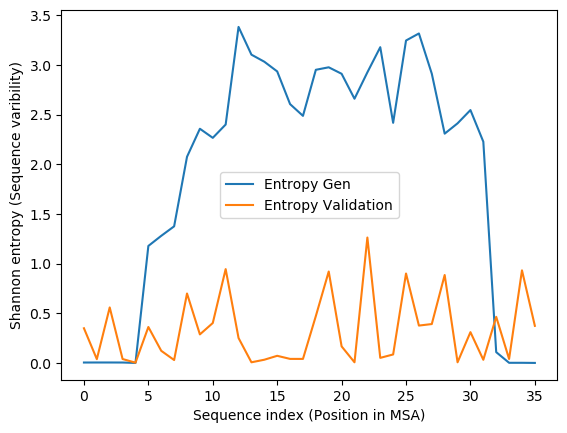

In [18]:
# Plot the Shannon entropy for each sequence
plt.plot(entropy_gen, label='Entropy Gen')


random_entropy_val = np.random.choice(entropy_val, size= len(entropy_gen) , replace=False) 

plt.plot(random_entropy_val, label='Entropy Validation')


plt.xlabel('Sequence index (Position in MSA)')
plt.ylabel('Shannon entropy (Sequence varibility)')
plt.legend()
plt.show()


##Shannon for blastdb aligned sequences  with full postion information

In [19]:
def get_entropy_from_alinged_seqs(aligned_seq_path):
    nat_entropies  = {}
    gen_entropies = {}
    df_escape = pd.read_csv(aligned_seq_path, header=0) #first row contains header info
    # df_escape.head()
    for index, row in df_escape.iterrows():
        sstart_pos = row['sstart']
        send_pos = row['send']
        # print(f"Subject start {sstart_pos} end: {send_pos}")
        qseq = row['qseq']
        sseq = row['sseq']
        # print(f"Query Seq: {qseq}, Suj Seq: {sseq}")
        qseq_entropy = shannon_entropy(qseq)
        sseq_entropy = shannon_entropy(sseq)
        # print(f"Query Seq entropy: {qseq_entropy} Sub Seq entropy: {sseq_entropy}")
        nat_entropies[sstart_pos] = sseq_entropy
        gen_entropies[sstart_pos] = qseq_entropy  #dictonary will remove sequence with same postions
    #return the sorted ones
    nat_entropies = {key: nat_entropies[key]  for key in sorted(nat_entropies) }
    gen_entropies = {key: gen_entropies[key]  for key in sorted(gen_entropies) }
    return nat_entropies , gen_entropies

def build_entropy_heat_map(nat_entropies, gen_entropies, save_path):
        #Generate heatMap 
        position_ranges = list(nat_entropies.keys())  #same for nat and generated
        data = { 
                "Natural" :  list(nat_entropies.values()) ,
                "Generated" : list(gen_entropies.values())
                }
        df = pd.DataFrame(data, index=position_ranges)
        sns.heatmap(df, annot=True, cmap='YlGnBu')
        plt.xlabel("Spike variablity, Shannon entropy")
        plt.ylabel('Spike Positions in MSA')
        # plt.grid(True)
        # plt.title('Entropy values Heatmap for Natural sequences and Generated Sequences')
        plt.savefig(save_path)
        plt.show()
        

In [20]:
def build_entropy_line_plot(nat_entropies, gen_entropies, save_path):
    # Plot the Shannon entropy for each sequence
    #sorted(nat_entropies) : sorted keys are given
    #Construct new dictionary based on keys 
  
    
    position_ranges = list(nat_entropies.keys())
    entropy_gen =list(gen_entropies.values())
    entropy_nat =list(nat_entropies.values())
    
    plt.plot(position_ranges, entropy_gen, label='Generated Spikes', marker='o', linestyle='-')
    plt.plot(position_ranges, entropy_nat, label='Natural Spikes')

    plt.xlabel('Spike Positions in MSA)')
    plt.ylabel('Shannon entropy (Sequence varibility)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig(save_path)

def build_smooth_entropy_line_plot(nat_entropies, gen_entropies, save_path):
    positions  = list(nat_entropies.keys())
    generated_entropies = list(gen_entropies.values())
    natural_entropies = list(nat_entropies.values())
    
    # Generate smooth curves using interpolation
    x_smooth = np.linspace(min(positions), max(positions), 300)  # Increase the number of points for smoothness (Equally spaced values between min and max)
    spl1 = make_interp_spline(positions, generated_entropies, k=3)  # k = 3 | Cubic interpolation | Piecewise third degree polymonial
    spl2 = make_interp_spline(positions, natural_entropies, k=3)  # Cubic interpolation for Group 2
    gen_entropies_smooth = spl1(x_smooth) #evaluate interpolated y values within the range of 300
    nat_entropies_smooth = spl2(x_smooth)

    # Plotting the smooth line plot
    plt.plot(x_smooth, gen_entropies_smooth, marker='', linestyle='-', color='b', label='Generated Spikes')
    plt.plot(x_smooth, nat_entropies_smooth, marker='', linestyle='-', color='g', label='Natural Spikes')

    # Adding labels, title, and legend
    plt.xlabel('Positions')
    plt.ylabel('Entropies (Shannon)')
    # plt.title('Smooth Line Plot: Comparison of Entropies between Generated and Natural spikes')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

def get_pearson_correlation(entropy_gen, entropy_natural):
    '''
    Computes the correlation score between entropies of generated spikes  and natural spikes 
    '''
    correlation_matrix = np.corrcoef(entropy_gen, entropy_natural)
    r = correlation_matrix[0, 1] #Matrix :  00 - 01 | 10 -  11  (Correlation between self 00 or 11)
    print("Pearson correlation Score:", correlation_matrix)
    return r
    

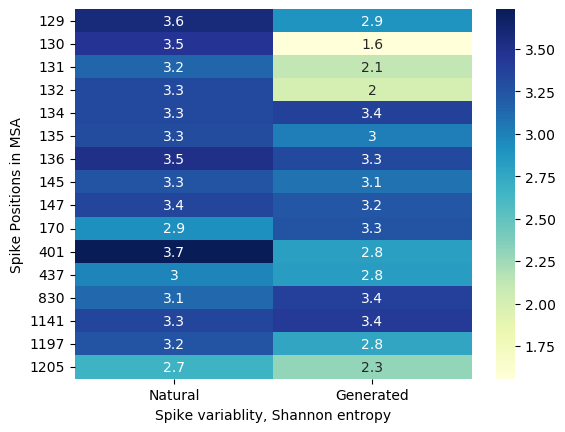

In [21]:
escape_alinged_seqs = "/home/perm/ProteinGAN/data/cov_seqs/sars_db/raw_datasets/aligment_results_fasta_12000_pred_score_filter_greater_than_50.csv"
nat_entropies, gen_entropies = get_entropy_from_alinged_seqs(escape_alinged_seqs)
save_path = "/home/perm/ProteinGAN/data/shannon"
build_entropy_heat_map(nat_entropies, gen_entropies, save_path+'/shannon_heatmap.png')

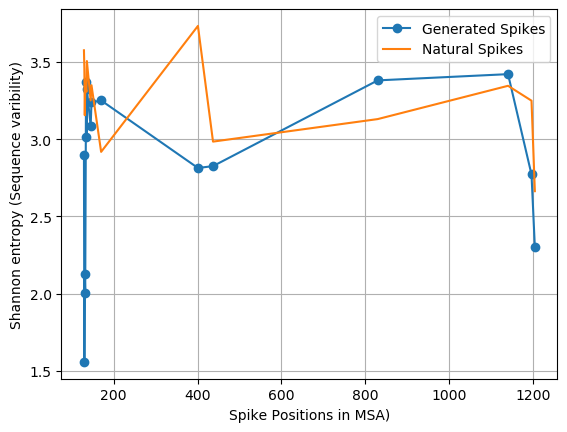

<Figure size 640x480 with 0 Axes>

In [22]:
build_entropy_line_plot(nat_entropies, gen_entropies, save_path+"/shannon_lineplot.png")

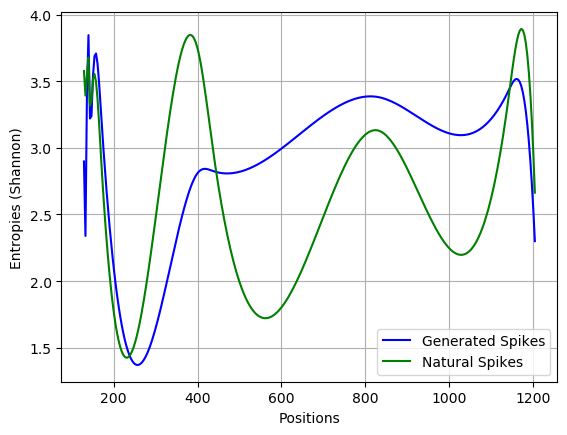

In [23]:
build_smooth_entropy_line_plot(nat_entropies, gen_entropies, save_path+"/shannon_smooth_lineplot.png")

In [27]:
#Linear relationship
pearson_correlation = get_pearson_correlation(list(nat_entropies.values()), list(gen_entropies.values()))
print("Pearson Correlation Score: ", pearson_correlation)


Pearson correlation Score: [[1.         0.06360701]
 [0.06360701 1.        ]]
Pearson Correlation Score:  0.06360701215319824


In [29]:
#Comptute spearman correlation (does not assume a linear relationship)
from scipy.stats import spearmanr
correlation_coefficient, p_value = spearmanr(list(nat_entropies.values()), list(gen_entropies.values()))
print(f"Spearmans Correlation: Corr coef: {correlation_coefficient} P value: {p_value}")


Spearmans Correlation: Corr coef: 0.049999999999999996 P value: 0.8540995521297436


In [36]:
np.mean((list(nat_entropies.values())))

3.2674261747659505

In [37]:
np.mean((list(gen_entropies.values())))

2.836807454163968